In [18]:
import numpy as np
import pandas as pd
from pandas import plotting
import mglearn, time
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC

Изменено `13.06.2021`

# Анализ данных

In [3]:
Data = pd.read_csv('var8.csv', delimiter = ',')
pd.options.display.float_format = '{:,.2f}'.format # Все дробные данные будут с 2-мя запятыми после запятой

print(Data.info()) # Общая информация о данных
Data.head(10) # Первые три строки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    150 non-null    float64
 1    att2   150 non-null    int64  
 2    att3   150 non-null    float64
 3    att4   150 non-null    int64  
 4    att5   150 non-null    object 
 5    att6   150 non-null    object 
 6    att7   150 non-null    int64  
 7    att8   150 non-null    object 
 8    att9   150 non-null    int64  
 9    att10  150 non-null    object 
 10   att11  150 non-null    float64
 11   att12  150 non-null    int64  
 12   class  150 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 15.4+ KB
None


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,class
0,7.12,3104,0.47,1,v2,v1,6356,v1,0,v1,0.79,2,class3
1,1.57,3584,0.62,1,v2,v2,6158,v2,0,v3,0.62,2,class2
2,3.49,3187,0.52,0,v2,v1,7181,v1,2,v1,1.95,0,class2
3,6.45,3500,0.32,1,v2,v1,4856,v1,0,v2,2.02,1,class2
4,6.81,3541,0.34,1,v2,v2,5201,v1,2,v3,1.44,1,class3
5,6.87,3558,0.47,0,v2,v1,7076,v1,1,v1,1.62,2,class3
6,5.59,3608,0.31,0,v1,v2,7308,v3,0,v3,0.59,2,class2
7,6.50,3143,0.39,2,v2,v2,3085,v1,2,v3,1.69,0,class2
8,1.73,3504,0.65,0,v2,v1,4583,v3,1,v1,0.74,2,class3
9,4.73,3467,0.13,2,v2,v2,4776,v1,0,v2,1.99,1,class3


Заменяем буквы на числа

In [4]:
data = Data.replace(to_replace = [' v1', ' v2', ' v3', ' class1', ' class2', ' class3'], value = [1, 2, 3, 0, 1, 2]) 
data = data.replace(to_replace = ['v1', 'v2', 'v3'], value = [1, 2, 3])
print(data.info(memory_usage=False)) # Чтобы принт не срал лишней строчкой
data.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    150 non-null    float64
 1    att2   150 non-null    int64  
 2    att3   150 non-null    float64
 3    att4   150 non-null    int64  
 4    att5   150 non-null    int64  
 5    att6   150 non-null    int64  
 6    att7   150 non-null    int64  
 7    att8   150 non-null    int64  
 8    att9   150 non-null    int64  
 9    att10  150 non-null    int64  
 10   att11  150 non-null    float64
 11   att12  150 non-null    int64  
 12   class  150 non-null    int64  
dtypes: float64(3), int64(10)None


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,class
0,7.12,3104,0.47,1,2,1,6356,1,0,1,0.79,2,2
1,1.57,3584,0.62,1,2,2,6158,2,0,3,0.62,2,1
2,3.49,3187,0.52,0,2,1,7181,1,2,1,1.95,0,1
3,6.45,3500,0.32,1,2,1,4856,1,0,2,2.02,1,1
4,6.81,3541,0.34,1,2,2,5201,1,2,3,1.44,1,2
5,6.87,3558,0.47,0,2,1,7076,1,1,1,1.62,2,2
6,5.59,3608,0.31,0,1,2,7308,3,0,3,0.59,2,1
7,6.50,3143,0.39,2,2,2,3085,1,2,3,1.69,0,1
8,1.73,3504,0.65,0,2,1,4583,3,1,1,0.74,2,2
9,4.73,3467,0.13,2,2,2,4776,1,0,2,1.99,1,2


Описание данных: кол-во строк, сред. знач., станд. отклонение, минимальное знач., 

In [5]:
print(data.describe())

        att1     att2   att3   att4   att5   att6     att7   att8   att9  \
count 150.00   150.00 150.00 150.00 150.00 150.00   150.00 150.00 150.00   
mean    4.51 3,267.08   0.41   1.19   1.54   1.25 5,104.27   2.01   0.91   
std     2.23   171.61   0.17   0.85   0.50   0.43 1,401.16   0.82   0.83   
min     1.41 3,069.00   0.13   0.00   1.00   1.00 3,013.00   1.00   0.00   
25%     1.94 3,133.50   0.28   0.00   1.00   1.00 4,036.75   1.00   0.00   
50%     5.33 3,150.00   0.47   1.00   2.00   1.00 4,576.00   2.00   1.00   
75%     6.40 3,442.50   0.53   2.00   2.00   1.00 6,479.00   3.00   2.00   
max     8.17 3,623.00   0.67   2.00   2.00   2.00 7,362.00   3.00   2.00   

        att10   att11   att12   class  
count  150.00  150.00  150.00  150.00  
mean     1.48    1.30    1.04    1.04  
std      0.81    0.50    0.78    0.78  
min      1.00    0.55    0.00    0.00  
25%      1.00    0.82    0.00    0.00  
50%      1.00    1.29    1.00    1.00  
75%      2.00    1.75    2.00    2.

In [6]:
DataPy = np.array(data) # Переводим данные из пандасовского формата в np-формат

# Записываем названия столбцов
columns = Data.columns
names = np.array(columns) 

X = DataPy[:,:-1] # Размечаем в датасете признаки (всё кроме посл. столбца)
y = DataPy[:,-1] # Размечаем в датасете классы (только посл. столбец)

X = MinMaxScaler().fit_transform(X) # Нормализация 

Думми классификатор

In [7]:
# Прогнозирование 
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X, y) # Находит наиболее частовстречающийся класс (баланс классов)
pred_most_frequent = dummy_majority.predict(X)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}%".format(100*dummy_majority.score(X, y)))
print("\nКоличество элементов в классах")
Data[" class"].value_counts() # Количество элементов в классах

Уникальные спрогнозированные метки: [1.]
Правильность на тестовом наборе: 38.67%

Количество элементов в классах


 class2    58
 class3    49
 class1    43
Name:  class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle = True)
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива x_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива x_train: (112, 12)
форма массива y_train: (112,)
форма массива x_test: (38, 12)
форма массива y_test: (38,)


In [9]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) # Узнаём баланс классов в сплите
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}%".format(100*dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [1.]
Правильность на тестовом наборе: 31.58%


Визуализация данных

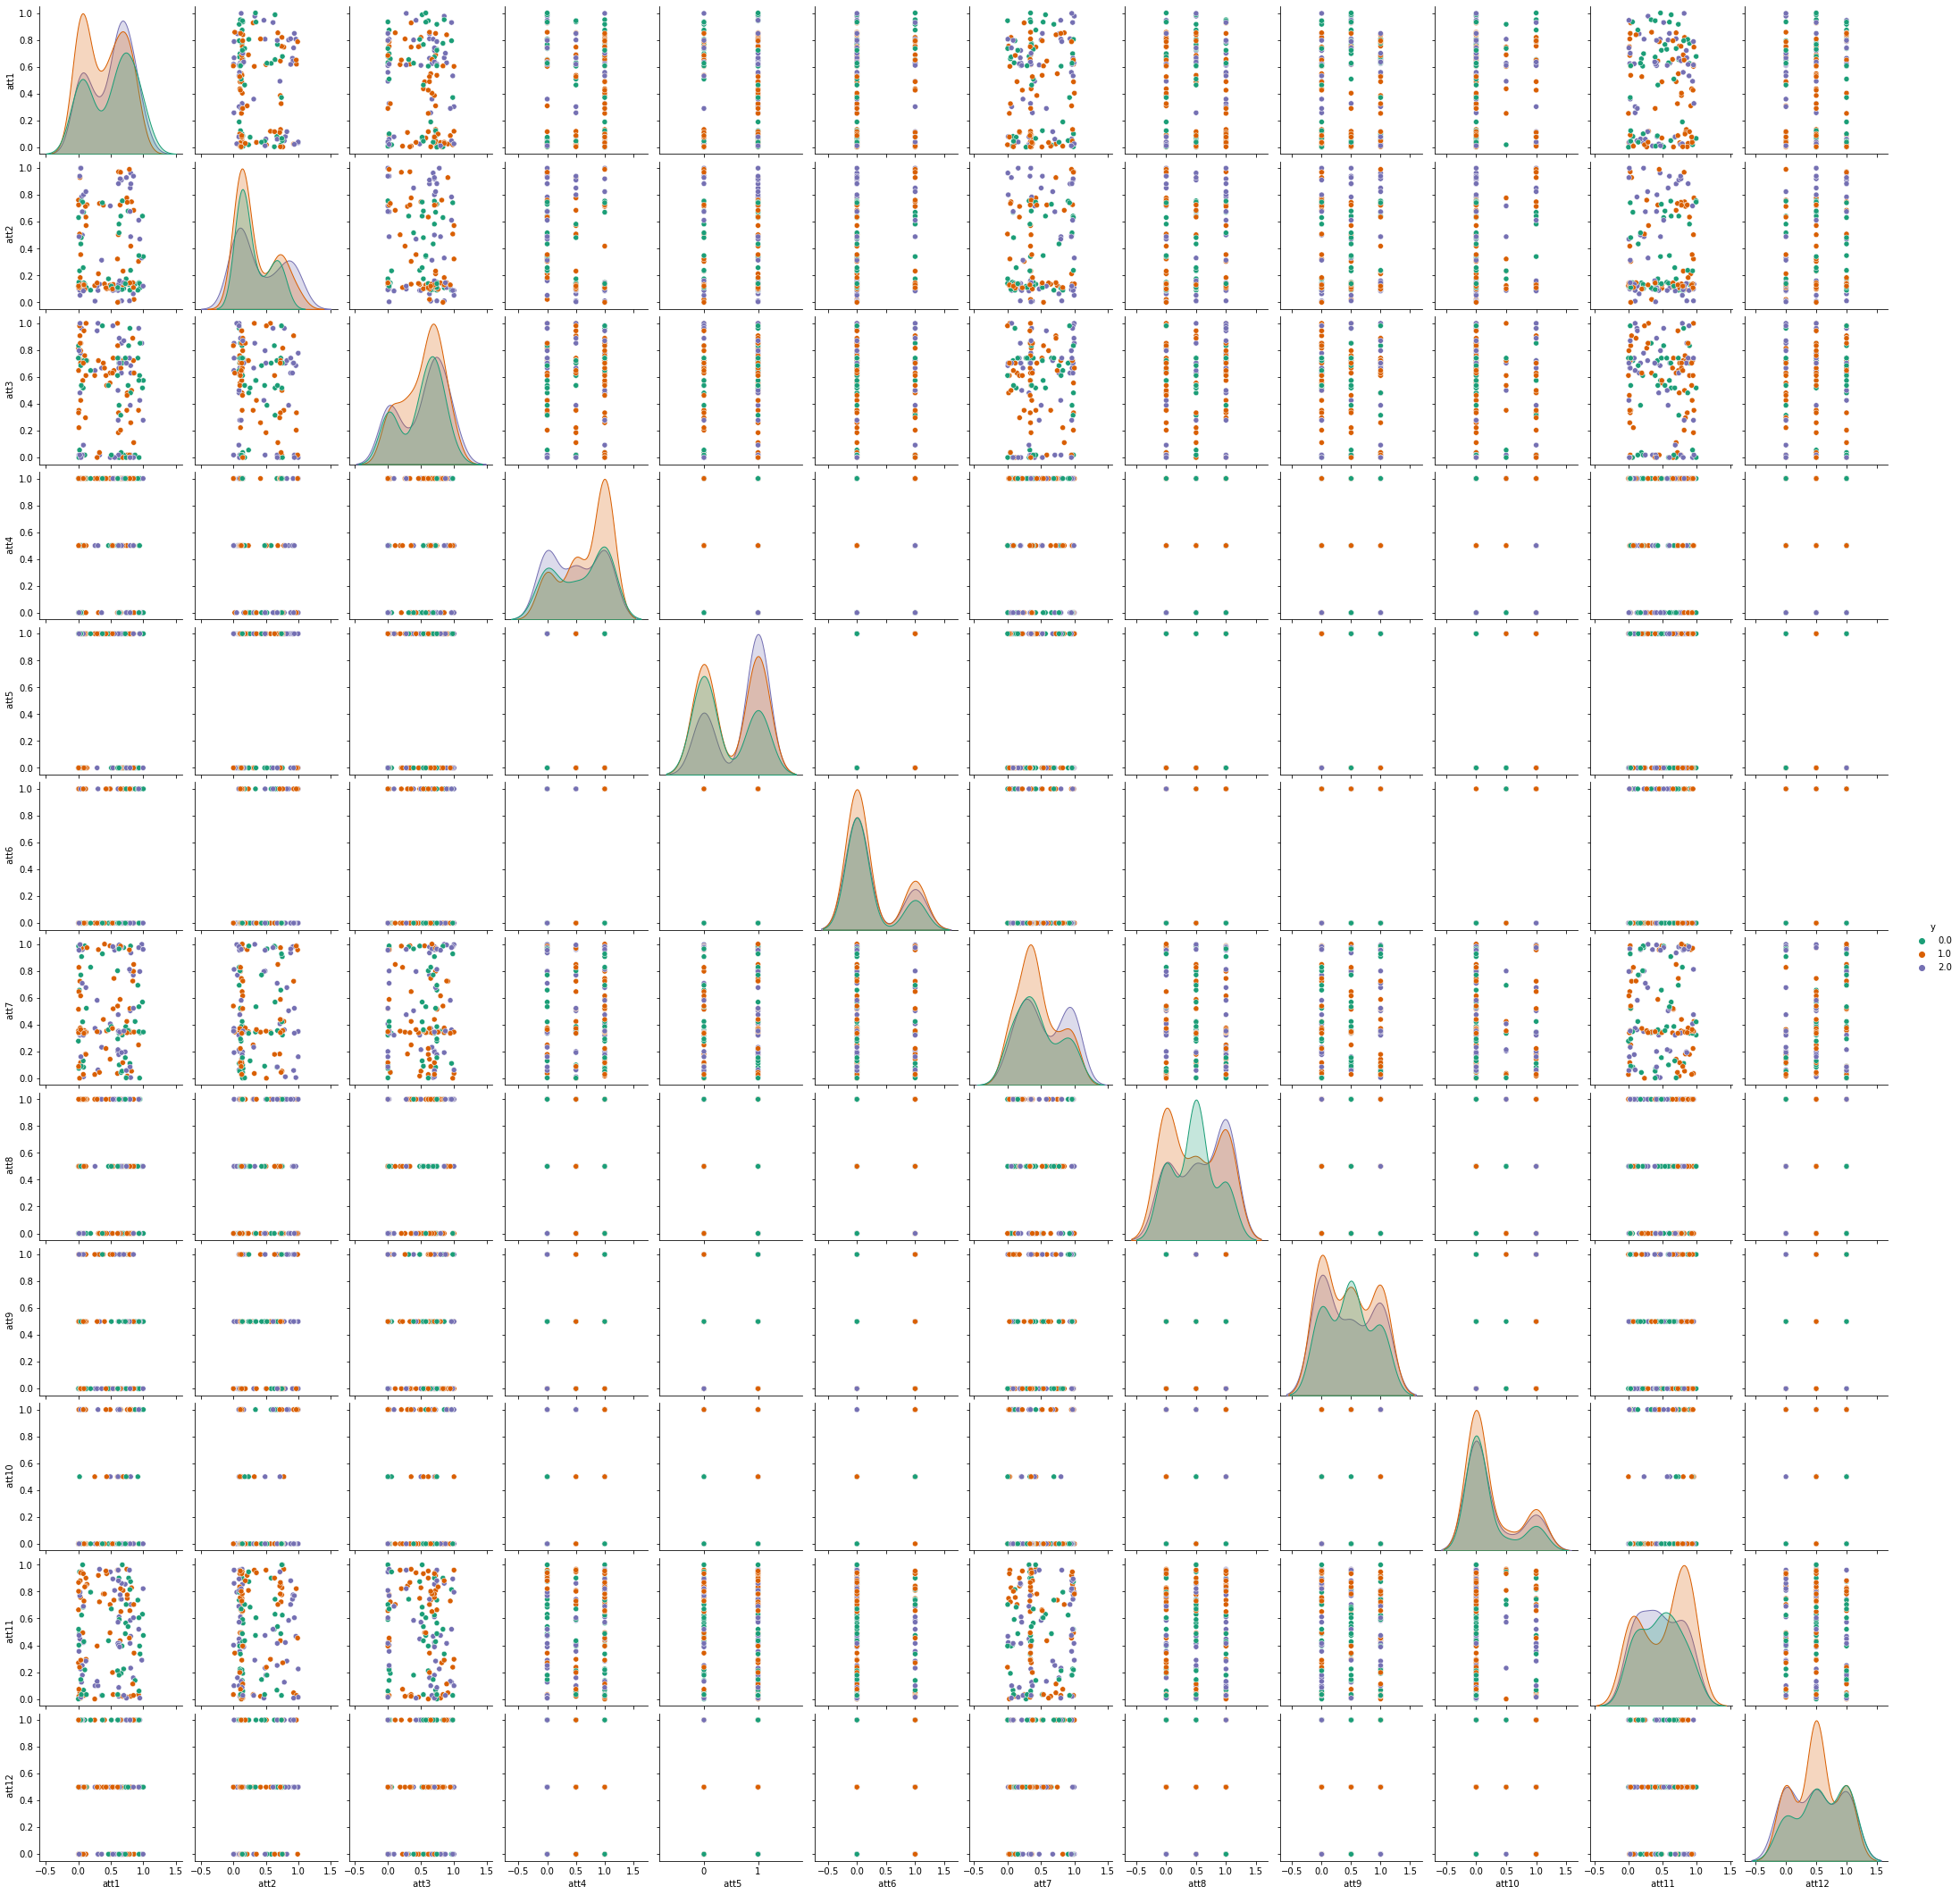

In [10]:
#
# Матрица диаграмм рассеивания на полном датасете
#
data_dataframe = pd.DataFrame(X, columns = names[:-1])
data_dataframe['y'] = y
# Если у тебя признаков больше 20, то закомменть строку нижу
sns.pairplot(data_dataframe, hue='y', palette='Dark2')

# Классификация данных

In [12]:
#
# Весь этот блок нужно прогнать. Он нужен для нахождения важных признаков.
#

# Здесь укажи процентную важность признаков
Vajn = 0.05

def feature_importances(Model):
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))

    n_features = X.shape[1]
    model = Model.fit(X_train, y_train)
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), names[:-1])
    plt.axvline(linewidth=2, color='red', linestyle = '--', x=Vajn, ymin=0, ymax=1)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

    # Костыльная фабрика по нахождению индексов важных признаков
    Feat_Im, Feat_Ind = list(), list()

    for i in range(X.shape[1]):
        if (model.feature_importances_[i] * 100) < Vajn * 100:
            Feat_Ind.append(i)
        else:
            Feat_Im.append(i)

    print("Модель ", Feat_Ind, ",в которой мы ищем признаки")          
    print(f"Индексы массивов с важностью менее {Vajn*100}% - ", Feat_Ind)           
    print(f"Индексы массивов с важностью более {Vajn*100}% - ", Feat_Im, '(',len(Feat_Im),')')
    
    return Feat_Ind, Feat_Im

Диаграмма и матрица диаграмм рассевиания важных признаков

Модель  [4, 5, 8, 9] ,в которой мы ищем признаки
Индексы массивов с важностью менее 5.0% -  [4, 5, 8, 9]
Индексы массивов с важностью более 5.0% -  [0, 1, 2, 3, 6, 7, 10, 11] ( 8 )


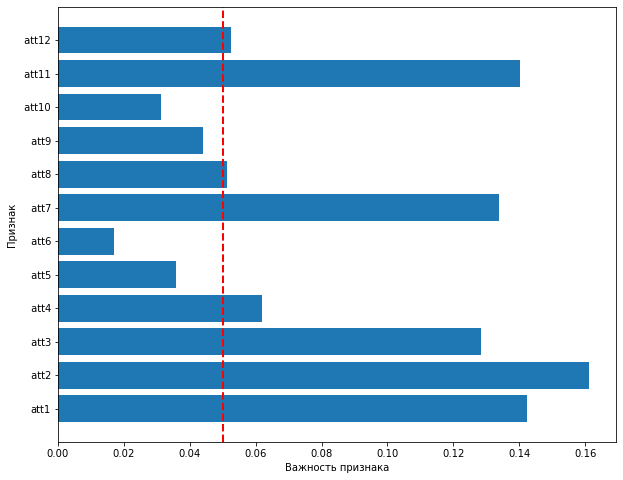

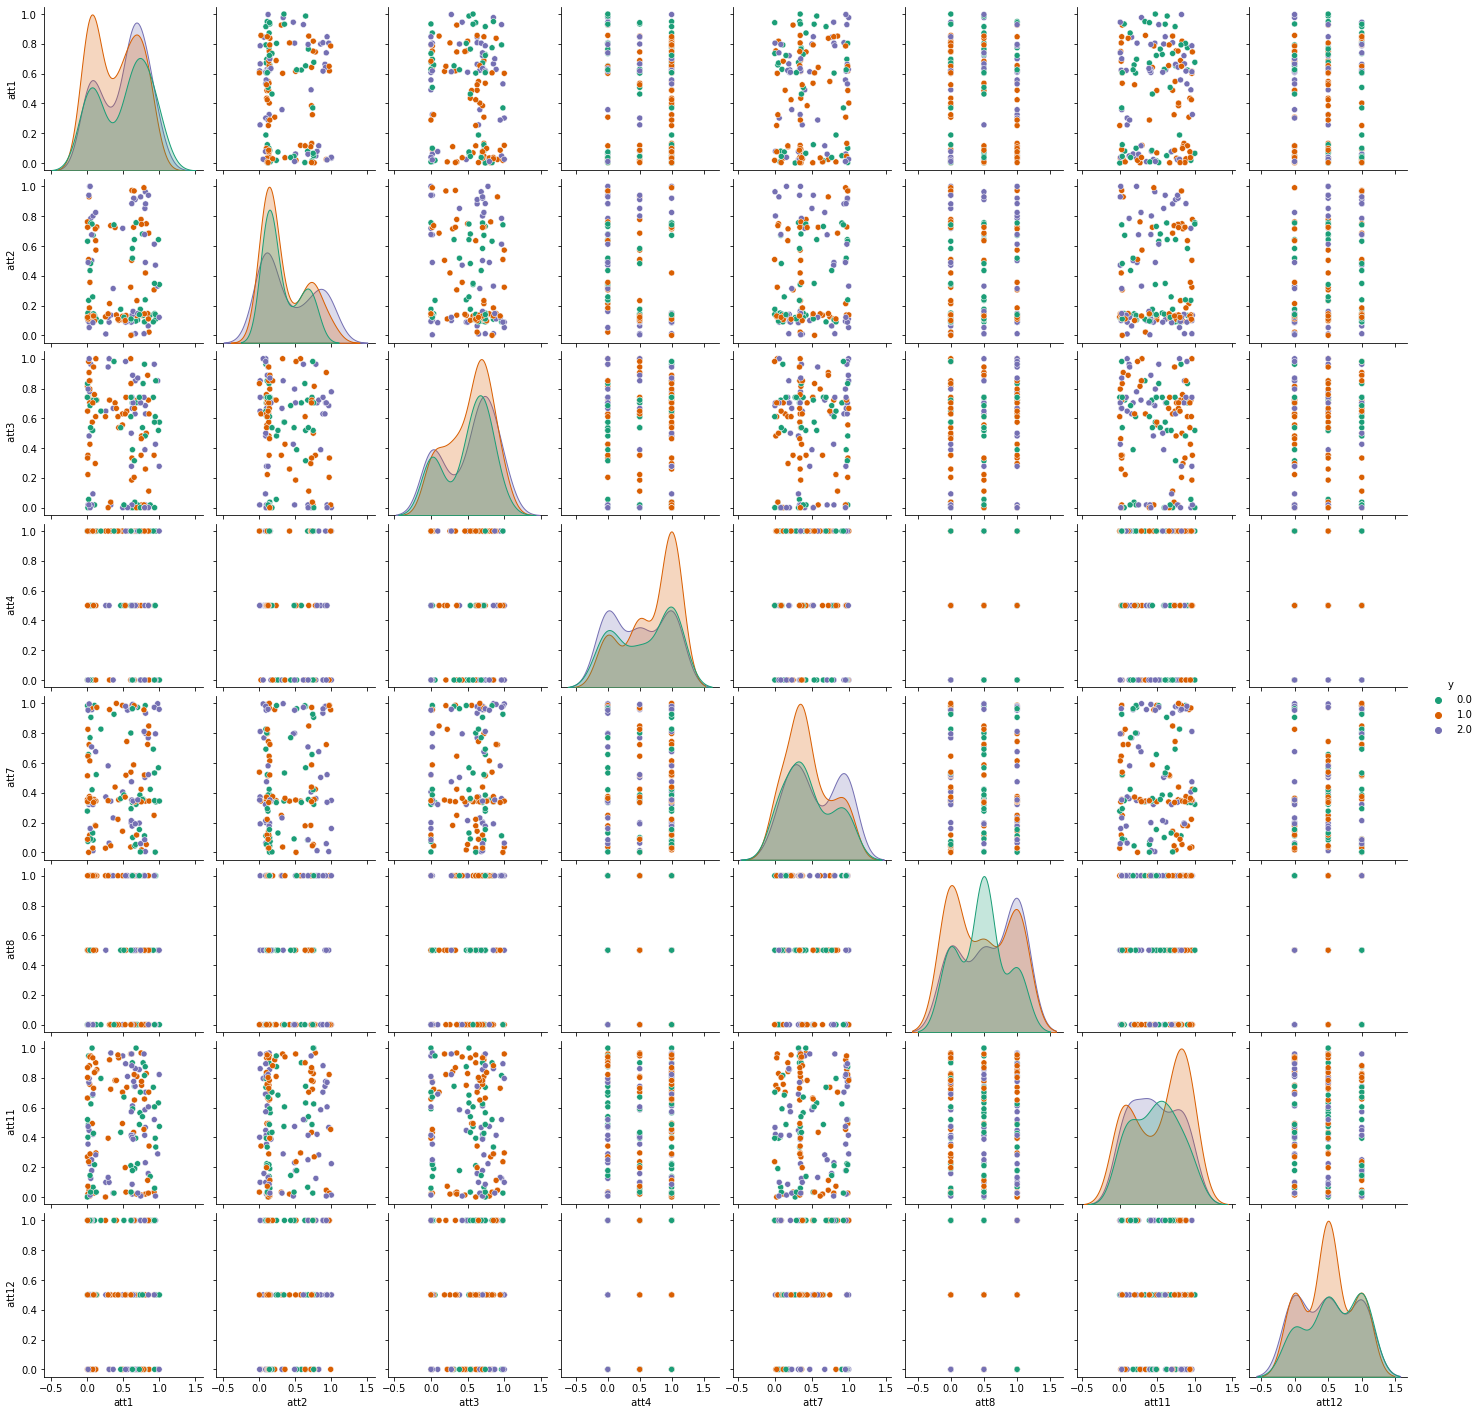

In [13]:
#
# Матрица диаграмм рассеивания с важными признаками
#
Model = RandomForestClassifier()
Feat_Ind, Feat_Im = feature_importances(Model)
ShortData = np.array(data.drop(data.columns[Feat_Ind],axis = 1)  ) 
X_trasformed = ShortData[:,:-1] 
X_trasformed = MinMaxScaler().fit_transform(X_trasformed)

data_dataframe = pd.DataFrame(X_trasformed, columns = names[Feat_Im])
data_dataframe['y'] = y
sns.pairplot(data_dataframe, hue='y', palette='Dark2')

In [14]:
def Info(Your_Classifier, param_grid, Your_CV, XF, random_st): # Обязательная ф-ия для перекр. проверки
    X_trainF, X_testF, y_trainF, y_testF = train_test_split(XF, y, random_state=random_st)
    grid_search = GridSearchCV(Your_Classifier, param_grid, cv = Your_CV).fit(X_trainF, y_trainF)
    print("\nКроссвалидация: ", Your_CV)
    print("Точность на обучении {:.2f}".format(grid_search.score(X_trainF, y_trainF)))
    print("Точность на тесте {:.2f}".format(grid_search.score(X_testF, y_testF)))
    print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
    print("Наилучшее значение перекрёстной проверки {:.2f}".format(grid_search.best_score_))
    
    global Otvet
    Otvet = pd.DataFrame(grid_search.cv_results_)
#     display(Otvet.head(5))

def Heat_Map(Par1, Par2, NPar1, NPar2, Otvet): # Тепловые карты для перекр. проверки
    fig, axes = plt.subplots(1, 1, figsize=(12, 5))
    Otvet = np.array(Otvet.mean_test_score).reshape(Par1, Par2) # Размер param_grid
    HM = mglearn.tools.heatmap(Otvet, xlabel=NPar2, xticklabels=param_grid[NPar2], # Обязательно поменять параметры из param_grid
                               ylabel=NPar1, yticklabels=param_grid[NPar1], cmap="viridis")
    plt.colorbar(HM)

In [15]:
# Инциализация количества разбиений
kfold = KFold(n_splits=5) # Параметр Кросс-валидации 
pkfold = KFold(n_splits=5, shuffle=True, random_state=1) # Та же самая кросс-валидация, но с перемешиванием

# Метод ближайших соседей

До отбора важных признаков (фильтра данных)

Сетка параметров:
 {'p': [1, 2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]} 

-----До фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.54
Точность на тесте 0.39
Наилучшее значение параметров: {'n_neighbors': 10, 'p': 2}
Наилучшее значение перекрёстной проверки 0.48

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.60
Точность на тесте 0.34
Наилучшее значение параметров: {'n_neighbors': 8, 'p': 1}
Наилучшее значение перекрёстной проверки 0.43


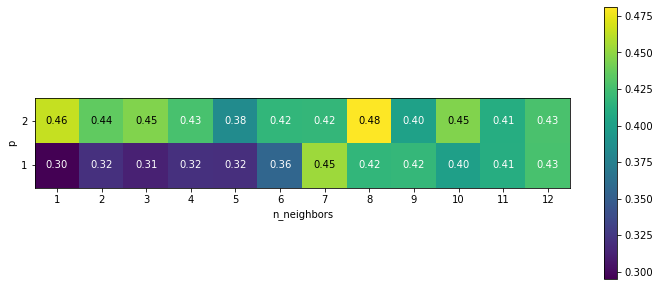

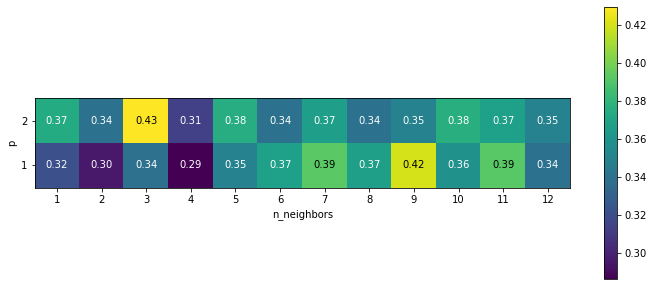

In [19]:
#
# Метод ближайших соседей
#
random_stat = 1 # Случайная постоянная для разделения тестов внутри функции Info
Set1 = [1, 2] # Инициализация значений параметров
Set2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
NSet1 = 'p' # Инициализация параметров
NSet2 = 'n_neighbors'
param_grid = {NSet1 : Set1 ,NSet2 : Set2} # Перекрёстная проверка будет по этим параметрам

print("Сетка параметров:\n", param_grid, '\n')

print("-----До фильтра данных-----") # Перекрёстная проверка по полному датасету
Info(KNeighborsClassifier(), param_grid, kfold, X, random_stat) # Функции Info делают перекрёстную проверку с параметрами в скобках
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet) # Рисование тепловой карты по предыдущему Info
Info(KNeighborsClassifier(), param_grid, pkfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

После отбора важных признаков (фильтра данных)

-----После фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.62
Точность на тесте 0.42
Наилучшее значение параметров: {'n_neighbors': 4, 'p': 2}
Наилучшее значение перекрёстной проверки 0.39

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.62
Точность на тесте 0.45
Наилучшее значение параметров: {'n_neighbors': 3, 'p': 2}
Наилучшее значение перекрёстной проверки 0.39


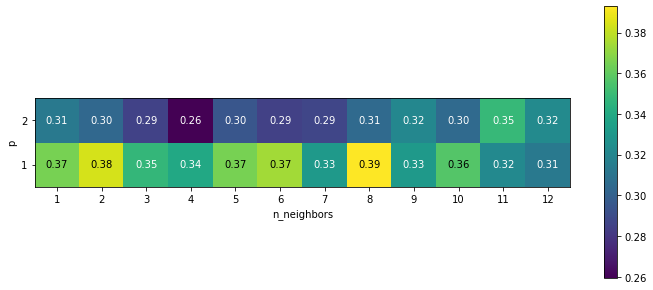

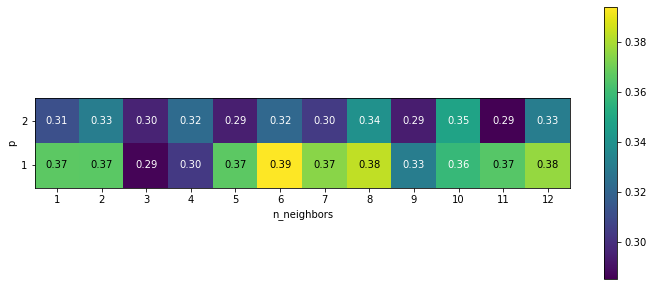

In [20]:
print("-----После фильтра данных-----")
Info(KNeighborsClassifier(), param_grid, kfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(KNeighborsClassifier(), param_grid, pkfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

# Метод опорных векторов (РБФ)

До отбора важных признаков (фильтра данных)

-----До фильтра данных-----
-----RBF-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.82
Точность на тесте 0.37
Наилучшее значение параметров: {'C': 1.0714364285714288, 'gamma': 0.714295}
Наилучшее значение перекрёстной проверки 0.44

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.41
Точность на тесте 0.32
Наилучшее значение параметров: {'C': 1e-05, 'gamma': 1e-05}
Наилучшее значение перекрёстной проверки 0.41


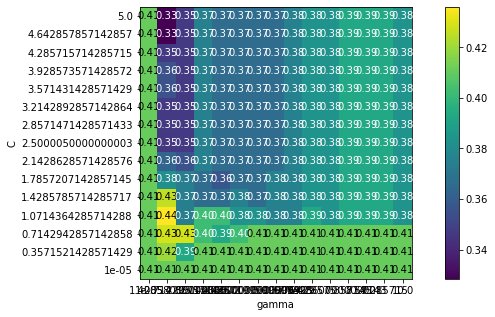

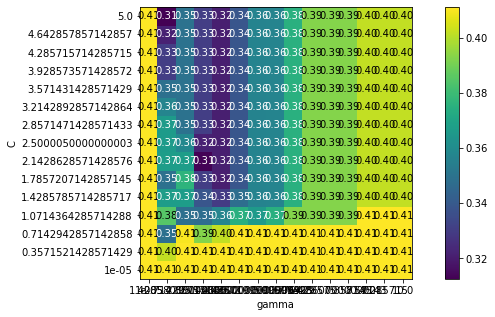

In [21]:
random_stat = 1
Set1 = np.linspace(0.00001, 5, 15)
Set2 = np.linspace(0.00001, 10, 15)
NSet1 = 'C'
NSet2 = 'gamma'
param_grid = {NSet1 : Set1 ,NSet2 : Set2}

print("-----До фильтра данных-----")
print("-----RBF-----")
Info(SVC(kernel = 'rbf'), param_grid, kfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(SVC(kernel = 'rbf'), param_grid, pkfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

После отбора важных признаков (фильтра данных)

-----После фильтра данных-----
-----RBF-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 1.00
Точность на тесте 0.32
Наилучшее значение параметров: {'C': 1.2857142857142856, 'gamma': 60.0}
Наилучшее значение перекрёстной проверки 0.43

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 1.00
Точность на тесте 0.32
Наилучшее значение параметров: {'C': 1.2857142857142856, 'gamma': 60.0}
Наилучшее значение перекрёстной проверки 0.43
Wall time: 3.42 s


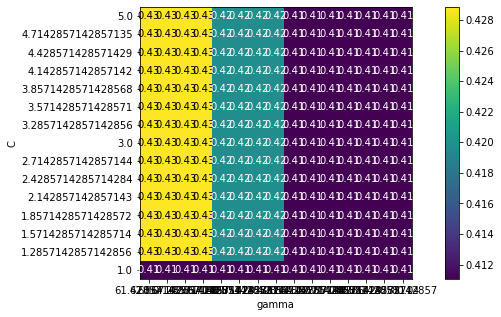

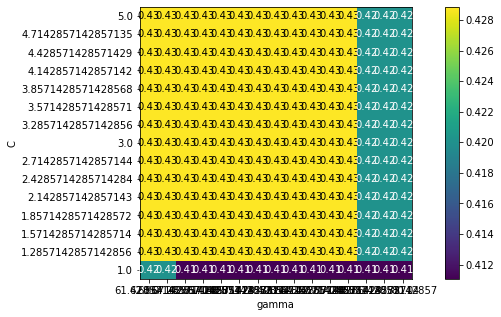

In [22]:
random_stat = 1
Set1 = np.linspace(1, 5, 15)
Set2 = np.linspace(60, 80, 15)
NSet1 = 'C'
NSet2 = 'gamma'
param_grid = {NSet1 : Set1 ,NSet2 : Set2}

print("-----После фильтра данных-----")
print("-----RBF-----")
Info(SVC(kernel = 'rbf'), param_grid, kfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(SVC(kernel = 'rbf'), param_grid, pkfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

# Метод опорных векторов (линейный)

До отбора важных признаков (фильтра данных)

-----Linear-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.53
Точность на тесте 0.37
Наилучшее значение параметров: {'C': 5.0000092857142855, 'gamma': 1e-05}
Наилучшее значение перекрёстной проверки 0.45

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.41
Точность на тесте 0.32
Наилучшее значение параметров: {'C': 1e-05, 'gamma': 1e-05}
Наилучшее значение перекрёстной проверки 0.41
Wall time: 8.61 s


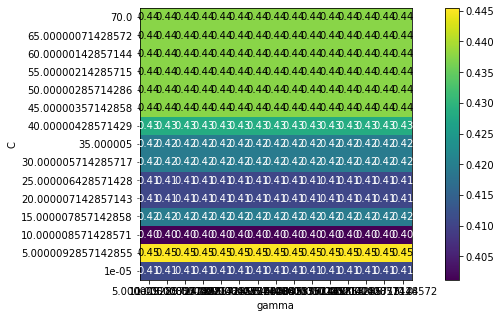

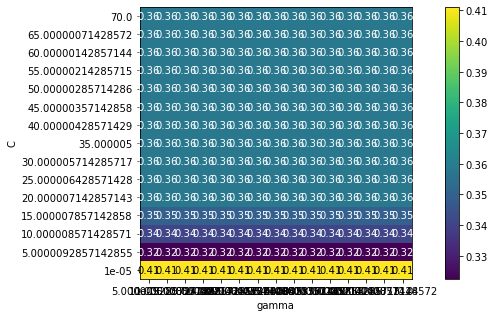

In [23]:
%%time
#
# Метод опорных векторов линейный
#
Set1 = np.linspace(0.00001, 70, 15)
Set2 = np.linspace(0.00001, 70, 15)
NSet1 = 'C'
NSet2 = 'gamma'
param_grid = {NSet1 : Set1 ,NSet2 : Set2}

print("-----Linear-----")
Info(SVC(kernel = 'linear'), param_grid, kfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(SVC(kernel = 'linear'), param_grid, pkfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

После отбора важных признаков (фильтра данных)

Я это закомментил потому что очень долго считается

In [ ]:
# Set1 = np.linspace(0.00001, 70, 15)
# Set2 = np.linspace(0.00001, 70, 15)

# print("-----Linear-----")
# Info(SVC(kernel = 'linear'), param_grid, kfold, X_trasformed, random_stat)
# Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
# Info(SVC(kernel = 'linear'), param_grid, pkfold, X_trasformed, random_stat)
# Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

# Случайный лес

До отбора важных признаков (фильтра данных)

Сетка параметров:
{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}
-----До фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 1.00
Точность на тесте 0.50
Наилучшее значение параметров: {'max_depth': 9, 'min_samples_split': 2}
Наилучшее значение перекрёстной проверки 0.45

Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.62
Точность на тесте 0.45
Наилучшее значение параметров: {'max_depth': 2, 'min_samples_split': 2}
Наилучшее значение перекрёстной проверки 0.47
Wall time: 1min 24s


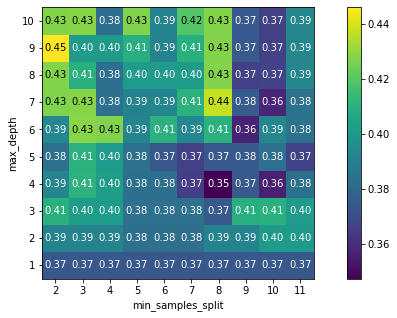

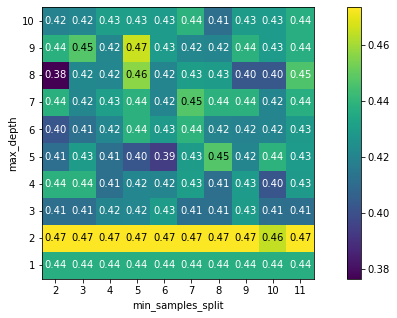

In [24]:
%%time
#
# Случаный лес
#
Set1 = np.linspace(1, 10, 10, dtype = int)
Set2 = np.linspace(2, 11, 10, dtype = int)
NSet1 = 'max_depth'
NSet2 = 'min_samples_split'
param_grid = {NSet1 : Set1 ,NSet2 : Set2}
print("Сетка параметров:\n{}".format(param_grid))
random_stat = 1

print("-----До фильтра данных-----")
Info(RandomForestClassifier(random_state = 1), param_grid, kfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(RandomForestClassifier(random_state = 1), param_grid, pkfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

После отбора важных признаков (фильтра данных)

-----После фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.76
Точность на тесте 0.58
Наилучшее значение параметров: {'max_depth': 4, 'min_samples_split': 2}
Наилучшее значение 0.48
------------Время выполнения 98.21  сек


Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.50
Точность на тесте 0.42
Наилучшее значение параметров: {'max_depth': 1, 'min_samples_split': 2}
Наилучшее значение 0.48
------------Время выполнения 98.97  сек



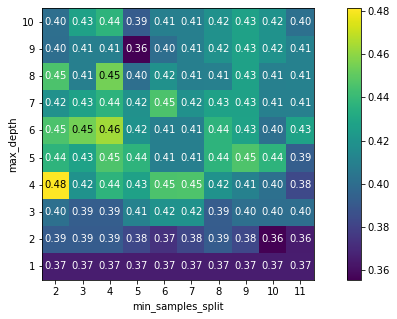

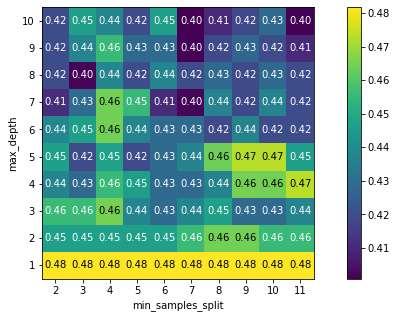

In [130]:
print("-----После фильтра данных-----")
Info(RandomForestClassifier(random_state = 1), param_grid, kfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(RandomForestClassifier(random_state = 1), param_grid, pkfold, X_trasformed, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

# Градиентный бустинг + отбор признаков

До отбора важных признаков (фильтра данных)

Сетка параметров:
{'max_depth': array([1, 2, 3, 4, 5]), 'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])}
Модель  [2, 3, 4, 5, 7, 8, 9, 11] ,в которой мы ищем признаки
Индексы массивов с важностью менее 10% -  [2, 3, 4, 5, 7, 8, 9, 11]
Индексы массивов с важностью более 10% -  [0, 1, 6, 10] ( 4 )
Сетка параметров:
{'max_depth': array([1, 2, 3, 4, 5]), 'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])}
-----До фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 1.00
Точность на тесте 0.61
Наилучшее значение параметров: {'learning_rate': 1.0, 'max_depth': 5}
Наилучшее значение 0.45
------------Время выполнения 42.98  сек


Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 0.55
Точность на тесте 0.39
Наилучшее значение параметров: {'learning_rate': 0.01, 'max_depth': 1}
Наилучшее значение 0.45
------------Время выполнения 41.49  сек



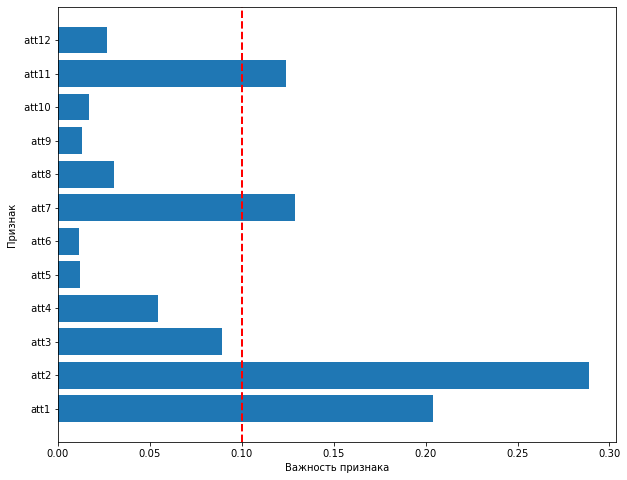

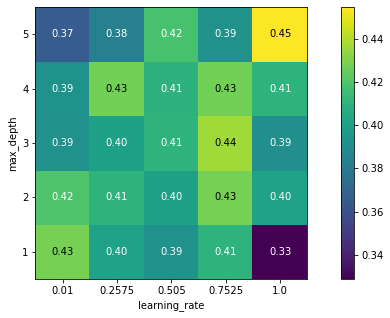

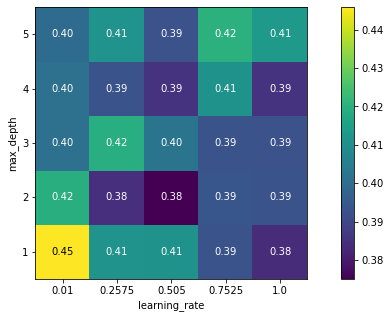

In [104]:
#
# Градиентный бустинг
#
Set1 = np.linspace(1, 5, 5, dtype = int)
Set2 = np.linspace(0.01, 1, 5, dtype = float)
NSet1 = 'max_depth'
NSet2 = 'learning_rate'
param_grid = {NSet1 : Set1 ,NSet2 : Set2}
print("Сетка параметров:\n{}".format(param_grid))
random_stat = 1

Model = GradientBoostingClassifier()
Feat_Ind, Feat_Im = feature_importances(Model)
ShortData = np.array(Data.drop(Data.columns[Feat_Ind],axis = 1)  ) 
X_trasforme = ShortData[:,:-1] 
X_trasformed = MinMaxScaler().fit_transform(X_trasformed)

print("Сетка параметров:\n{}".format(param_grid))
random_stat = 1 

print("-----До фильтра данных-----")
Info(GradientBoostingClassifier(random_state = 1), param_grid, kfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(GradientBoostingClassifier(random_state = 1), param_grid, pkfold, X, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)

После отбора важных признаков (фильтра данных)

-----После фильтра данных-----

Кроссвалидация:  KFold(n_splits=5, random_state=None, shuffle=False)
Точность на обучении 0.65
Точность на тесте 0.55
Наилучшее значение параметров: {'learning_rate': 0.01, 'max_depth': 2}
Наилучшее значение 0.47
------------Время выполнения 40.57  сек


Кроссвалидация:  KFold(n_splits=5, random_state=1, shuffle=True)
Точность на обучении 1.00
Точность на тесте 0.55
Наилучшее значение параметров: {'learning_rate': 0.2575, 'max_depth': 5}
Наилучшее значение 0.50
------------Время выполнения 39.06  сек



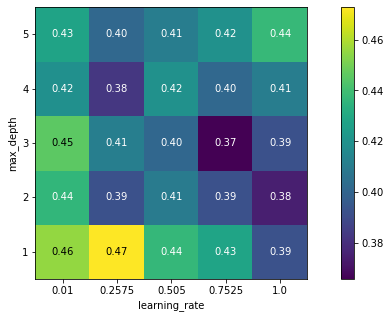

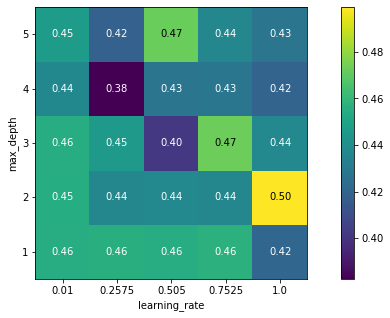

In [108]:
print("-----После фильтра данных-----")
Info(GradientBoostingClassifier(random_state = 1), param_grid, kfold, X_trasforme, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)
Info(GradientBoostingClassifier(random_state = 1), param_grid, pkfold, X_trasforme, random_stat)
Heat_Map(len(Set1), len(Set2), NSet1, NSet2, Otvet)